In [57]:
#Importing data from csv
from pandas import read_csv
import pandas as pd

zerg_data = read_csv('../Output/ZergFeb.csv', header=0, index_col=False)
display(zerg_data)

,match_id,map_name,region,game_length,race,enemy_race,ap30s,frame,second,player,...,spawningpool,spinecrawler,spire,sporecrawler,swarmhost,ultralisk,ultraliskcavern,viper,zergling,win
0,0,Acropolis LE,us,551,Z,Z,0.0,1,0,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
1,0,Acropolis LE,us,551,Z,Z,532.0,480,30,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
2,0,Acropolis LE,us,551,Z,Z,420.0,960,60,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
3,0,Acropolis LE,us,551,Z,Z,352.8,1440,90,Player 1 - soO (Zerg),...,0,0,0,0,0,0,0,0,0,1
4,0,Acropolis LE,us,551,Z,Z,358.4,1920,120,Player 1 - soO (Zerg),...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81321,3455,Eternal Empire LE,eu,1610,Z,T,568.4,33600,2100,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,3,71,1
81322,3455,Eternal Empire LE,eu,1610,Z,T,590.8,34080,2130,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,3,68,1
81323,3455,Eternal Empire LE,eu,1610,Z,T,758.8,34560,2160,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,3,80,1
81324,3455,Eternal Empire LE,eu,1610,Z,T,476.0,35040,2190,Player 1 - Reynor (Zerg),...,1,0,1,9,0,0,0,2,79,1


In [58]:
from sklearn.preprocessing import MinMaxScaler

no_normalize = ['match_id','map_name','region','race','enemy_race','frame','second','player','game_length']

#Names of Columns that we want to Normalize (Numerical variables only)
normalize_columns = [x for x in list(zerg_data) if x not in no_normalize]

#Normalizing these columns
norm = zerg_data[normalize_columns].values
norm_scaled = MinMaxScaler().fit_transform(norm)
zerg_data_normalized = pd.DataFrame(norm_scaled, columns=normalize_columns, index=zerg_data.index)

#One-hot Encoding the categorical variables
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['map_name'], prefix='Map'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['region'], prefix='Region'))
zerg_data_normalized = zerg_data_normalized.join(pd.get_dummies(zerg_data['enemy_race'], prefix='Enemy'))

#Displaying first and last 5 rows
display(zerg_data_normalized.head(5), zerg_data_normalized.tail(5))

,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
0,0.000000,0.111111,0.049020,0.000000,0.003451,0.000000,0.000000,0.003711,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
1,0.144158,0.120370,0.058824,0.000000,0.003796,0.164452,0.027397,0.005566,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
2,0.113809,0.129630,0.068627,0.024096,0.016563,0.182749,0.018265,0.011132,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
3,0.095599,0.148148,0.078431,0.024096,0.006211,0.188848,0.082192,0.014842,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,0.097117,0.148148,0.078431,0.024096,0.006556,0.201046,0.141553,0.014842,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1


,ap30s,workers_active_count,food_used,food_made,minerals_current,minerals_collection_rate,minerals_used_in_progress,minerals_used_current,minerals_used_active_forces,minerals_lost,...,Map_킹스 코브 - 래더,Map_트라이튼 - 래더,Map_필러스 오브 골드 - 래더,Region_cn,Region_eu,Region_kr,Region_us,Enemy_P,Enemy_T,Enemy_Z
81321,0.154021,0.629630,0.901961,0.572289,0.093444,0.621869,0.182648,0.564007,0.430147,0.625062,...,0,0,0,0,1,0,0,0,1,0
81322,0.160091,0.629630,0.909314,0.572289,0.104141,0.634067,0.127854,0.579777,0.461397,0.636691,...,0,0,0,0,1,0,0,0,1,0
81323,0.205615,0.629630,0.928922,0.572289,0.090683,0.597473,0.091324,0.594620,0.498162,0.647195,...,0,0,0,0,1,0,0,0,1,0
81324,0.128983,0.620370,0.872549,0.572289,0.136577,0.579177,0.054795,0.584416,0.488971,0.662575,...,0,0,0,0,1,0,0,0,1,0
81325,0.000000,0.574074,0.970588,0.572289,0.111387,0.548682,0.063927,0.621521,0.580882,0.666327,...,0,0,0,0,1,0,0,0,1,0


In [59]:
#Split data into dependent and independent variables
no_X = ['win']
yes_X = [x for x in list(zerg_data_normalized) if x not in no_X]

Y = zerg_data_normalized['win']
X_normalized = zerg_data_normalized[yes_X]

In [60]:
#Split data into training, validation and testing set
train_split = 0.8
val_split = 0.2

num_data = len(X_normalized)
num_val = int(train_split * val_split * num_data)
num_train = int(train_split * num_data) - num_val
num_test = num_data - int(train_split * num_data)


Y_train = Y[0:num_train]
Y_val = Y[num_train:(num_train + num_val)]
Y_test = Y[(num_val + num_train):]


X_normalized_train = X_normalized[0:num_train]
X_normalized_val = X_normalized[num_train:(num_train + num_val)]
X_normalized_test = X_normalized[(num_val + num_train):]

In [61]:
X_train = zerg_data_normalized[0:num_train]
X_val = zerg_data_normalized[num_train:(num_train + num_val)]
X_test = zerg_data_normalized[(num_val + num_train):]

In [62]:
Y_train.shape

(52048,)

In [63]:
X_train.shape

(52048, 116)

In [64]:
import numpy as np

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=X_train, val_df=X_val, test_df=X_test,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [65]:
w1 = WindowGenerator(input_width=15, label_width=15, shift=1,
                     label_columns=['win'])
w1

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [66]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [67]:
import tensorflow as tf
tf.random.set_seed(1111)

# Stack three slices, the length of the total window:
example_window = tf.stack([np.array(X_normalized[:w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (1, 16, 115)
Inputs shape: (1, 15, 115)
labels shape: (1, 15, 1)


In [68]:
import matplotlib.pyplot as plt

def plot(self, model=None, plot_col='win', max_subplots=1):
  inputs, labels = self.example
  plt.figure(figsize=(20,15))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(3, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time Step')

WindowGenerator.plot = plot

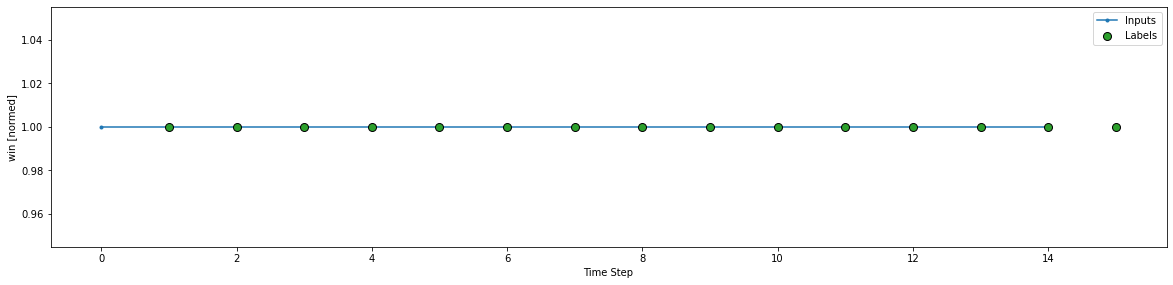

In [69]:
w1.example = example_inputs, example_labels
w1.plot()

In [70]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [71]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [72]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['win'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['win']

In [73]:
wide_window = WindowGenerator(
    input_width=15, label_width=15, shift=1,
    label_columns=['win'])

wide_window

Total window size: 16
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']

In [74]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.Precision(),
                        tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [75]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [76]:
val_performance = {}
performance = {}

history = compile_and_fit(linear, wide_window)

val_performance['Linear'] = linear.evaluate(wide_window.val)
performance['Linear'] = linear.evaluate(wide_window.test, verbose=0)

Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Label column name(s): ['win']> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Epoch 1/50
1627/1627 [======================

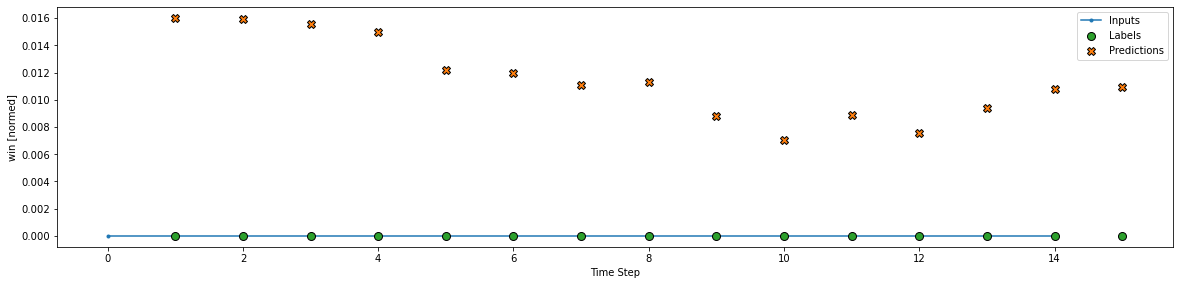

In [77]:
#Linear

wide_window.plot(linear)

In [78]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=131, activation='sigmoid'),
    tf.keras.layers.Dense(units=65, activation='sigmoid'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

history = compile_and_fit(dense, wide_window)

val_performance['Dense'] = dense.evaluate(wide_window.val)
performance['Dense'] = dense.evaluate(wide_window.test, verbose=0)

Epoch 1/50
1627/1627 [==============================] - 5s 3ms/step - loss: 0.1684 - binary_accuracy: 0.9531 - precision_7: 0.9541 - recall_7: 0.9534 - auc_7: 0.9825 - val_loss: 0.0844 - val_binary_accuracy: 0.9824 - val_precision_7: 0.9799 - val_recall_7: 0.9814 - val_auc_7: 0.9857
Epoch 2/50
1627/1627 [==============================] - 4s 3ms/step - loss: 0.0770 - binary_accuracy: 0.9829 - precision_7: 0.9830 - recall_7: 0.9833 - auc_7: 0.9895 - val_loss: 0.0743 - val_binary_accuracy: 0.9825 - val_precision_7: 0.9799 - val_recall_7: 0.9816 - val_auc_7: 0.9925
Epoch 3/50
1627/1627 [==============================] - 4s 3ms/step - loss: 0.0644 - binary_accuracy: 0.9829 - precision_7: 0.9826 - recall_7: 0.9838 - auc_7: 0.9954 - val_loss: 0.0638 - val_binary_accuracy: 0.9826 - val_precision_7: 0.9796 - val_recall_7: 0.9822 - val_auc_7: 0.9960
Epoch 4/50
1627/1627 [==============================] - 4s 3ms/step - loss: 0.0540 - binary_accuracy: 0.9829 - precision_7: 0.9828 - recall_7: 0.983

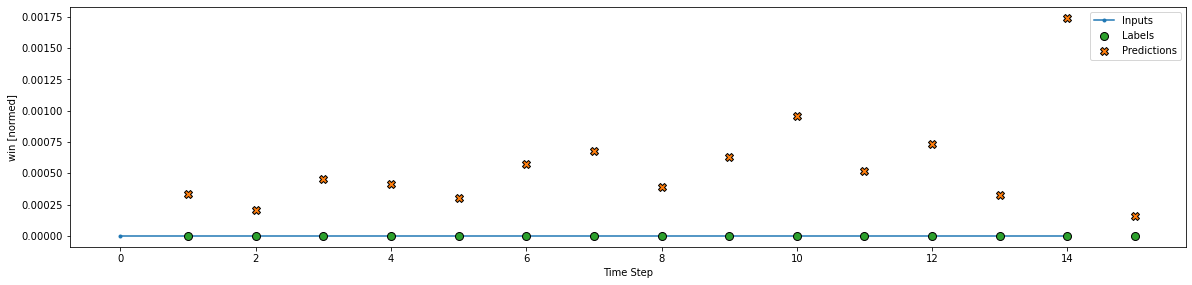

In [79]:
#Dense

wide_window.plot(dense)

In [80]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [81]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

Input shape: (32, 15, 116)
Output shape: (32, 15, 1)


In [82]:
history = compile_and_fit(lstm_model, wide_window)

val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/50
1627/1627 [==============================] - 9s 5ms/step - loss: 0.1290 - binary_accuracy: 0.9691 - precision_8: 0.9677 - recall_8: 0.9716 - auc_8: 0.9881 - val_loss: 0.0761 - val_binary_accuracy: 0.9828 - val_precision_8: 0.9812 - val_recall_8: 0.9811 - val_auc_8: 0.9933
Epoch 2/50
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0652 - binary_accuracy: 0.9830 - precision_8: 0.9831 - recall_8: 0.9833 - auc_8: 0.9959 - val_loss: 0.0694 - val_binary_accuracy: 0.9818 - val_precision_8: 0.9797 - val_recall_8: 0.9803 - val_auc_8: 0.9959
Epoch 3/50
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0537 - binary_accuracy: 0.9834 - precision_8: 0.9830 - recall_8: 0.9842 - auc_8: 0.9977 - val_loss: 0.0614 - val_binary_accuracy: 0.9811 - val_precision_8: 0.9789 - val_recall_8: 0.9795 - val_auc_8: 0.9968
Epoch 4/50
1627/1627 [==============================] - 8s 5ms/step - loss: 0.0444 - binary_accuracy: 0.9846 - precision_8: 0.9843 - recall_8: 0.985

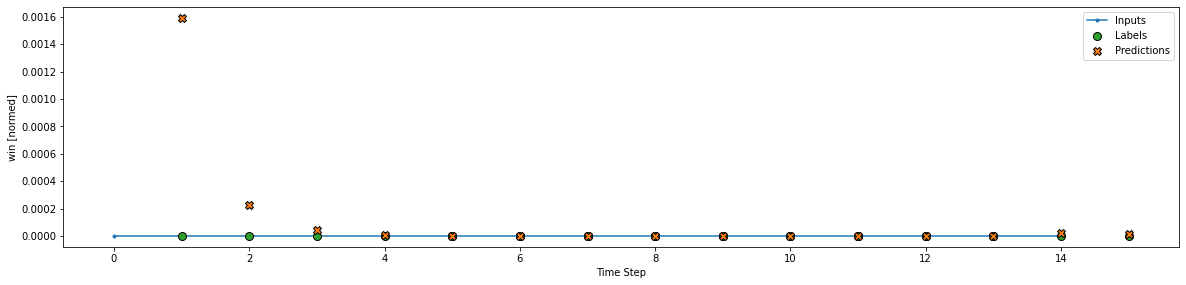

In [83]:
#LSTM

wide_window.plot(lstm_model)

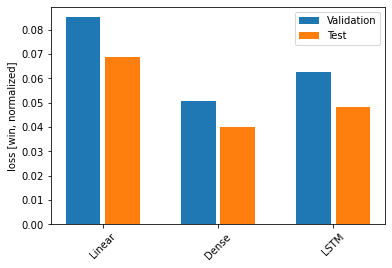

In [84]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'loss'
metric_index = lstm_model.metrics_names.index('loss')
val_loss = [v[metric_index] for v in val_performance.values()]
test_loss = [v[metric_index] for v in performance.values()]

plt.ylabel('loss [win, normalized]')
plt.bar(x - 0.17, val_loss, width, label='Validation')
plt.bar(x + 0.17, test_loss, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()